In [1]:
_=!git clone https://github.com/Sht97/Accelerometer-Gyro-dataset.git dataset
!cd dataset && git pull

Already up to date.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf
from scikitplot.metrics import plot_confusion_matrix#Esta librería toca instalarla "conda install -c conda-forge scikit-plot"
from sklearn.model_selection import train_test_split

archivos  = ['Daniel/Activacion','Daniel/Complejo','Daniel/Encender','Daniel/X'
             ,'Raul/Activacion','Raul/Complejo','Raul/Encender','Raul/X']
archivos2 = ['Daniel/Encender','Raul/Encender','Daniel/Complejo','Raul/Complejo','Daniel/X','Raul/X']

 
G0 = ['Daniel/Activacion','Raul/Activacion']  # 3
G1 = ['Daniel/Encender','Raul/Encender']    # 0 
G2 = ['Daniel/Complejo','Raul/Complejo']    # 2
G3 = ['Daniel/X','Raul/X']           # 1

x = []
y = []
for archivo in archivos2:

  df1=pd.read_csv('dataset/'+ archivo +'.csv')

  cambios=df1[df1['Tiempo']=='Order'].index.tolist()

  for i in cambios:
    gesto1=df1[(df1.index>=i-300)&(df1.index<i)].astype(int)
    gesto1 = gesto1.to_numpy()

    m=np.fft.rfft(gesto1[:,2:8],axis=0)
    f=25
    ones=np.ones(f)
    zeros=np.zeros(m.shape[0]-f)
    c=np.concatenate((ones,zeros))
    clean=m*c.reshape(m.shape[0],1)
    m=np.fft.irfft(clean,axis=0)
    x.append(m)

    #x.append(gesto1[:,2:8])

    if archivo in G0:
      y.append(3)
    elif archivo in G1:
      y.append(0)
    elif archivo in G2:
      y.append(2)
    else:
      y.append(1)



x = np.array(x)
y = np.array(y)

#x = (x+32762)/65536

x_train,x_test,y_train,y_test =  train_test_split(x,y)


print(x_train.shape)
print(y_train)



(464, 300, 6)
[2 2 2 0 2 2 1 1 1 2 1 1 1 0 1 0 0 1 2 2 2 0 2 0 1 0 2 1 1 2 1 0 1 1 2 1 1
 0 1 2 2 2 0 0 1 0 1 0 0 2 0 1 0 0 0 1 2 1 2 0 1 2 2 0 2 1 1 1 0 1 0 2 0 1
 1 0 2 1 2 1 2 1 0 0 1 1 2 2 2 0 2 2 1 2 0 1 1 0 1 2 0 0 1 1 1 1 2 1 2 1 2
 1 2 0 0 0 2 0 0 0 2 0 2 0 1 2 0 2 0 0 0 0 2 1 1 0 2 2 0 0 0 0 0 1 0 0 1 2
 2 0 1 0 1 0 2 2 2 2 2 2 2 0 0 2 2 2 1 0 1 1 2 2 0 0 2 0 0 0 1 1 0 0 2 0 1
 1 1 2 0 1 0 2 2 1 0 0 0 2 0 0 1 2 2 1 1 0 1 0 0 1 1 1 0 2 0 2 0 2 1 1 2 0
 0 0 0 2 2 0 2 0 2 2 0 1 1 2 2 2 1 1 2 0 2 2 1 0 1 1 1 2 1 0 2 2 0 1 0 2 1
 2 1 0 0 1 2 1 0 2 1 2 1 0 2 2 0 1 1 2 2 2 1 1 2 0 0 2 2 2 0 2 1 2 0 2 2 1
 1 2 0 0 1 2 2 0 0 2 1 2 1 2 1 2 2 1 1 1 2 1 1 0 2 0 2 2 2 1 2 2 2 1 1 2 2
 1 1 2 2 0 1 0 0 2 0 2 0 2 2 2 0 1 1 0 2 2 0 2 2 0 2 1 1 1 2 0 1 2 2 0 1 2
 1 2 2 0 1 1 0 0 1 1 2 2 1 2 1 1 2 0 2 0 2 0 2 2 0 2 2 2 0 2 0 0 0 0 2 2 0
 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 2 0 0 2 2 2 2 0 2 2 0 0 1 2 0 1 2 0 0 1 0
 1 0 0 0 1 0 0 1 1 1 0 2 0 0 2 2 1 0 0 0]


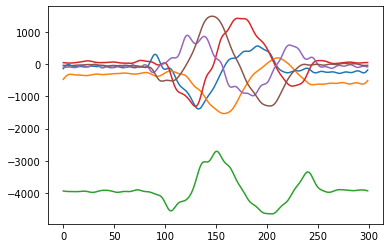

In [3]:
plt.plot(x[0])
plt.show()

In [4]:
def get_conv_model_A(num_classes, compile=True):
    print("using",num_classes,"classes")
    inputs = tf.keras.Input(shape=(300,6), name="input_1")
    layers = tf.keras.layers.Conv1D(15,50, activation="relu", padding="SAME")(inputs)
    layers = tf.keras.layers.Flatten()(layers)
    layers = tf.keras.layers.Dense(16, activation=tf.nn.relu)(layers)
    layers = tf.keras.layers.Dropout(0.2)(layers)
    predictions = tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax, name="output_1")(layers)
    model = tf.keras.Model(inputs = inputs, outputs=predictions)
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    if compile:
        model.compile(optimizer=opt,
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])
    return model

def train(model, batch_size, epochs, model_name=""):
    model.reset_states()
    model.fit(x_train, y_train, epochs=epochs,
              batch_size=batch_size,
              validation_data=(x_test, y_test),verbose=1)
    metrics = model.evaluate(x_test, y_test)
    return {k:v for k,v in zip (model.metrics_names, metrics)}

In [5]:
model = get_conv_model_A(3)
weights = model.get_weights()
for i in weights:
    print(i.shape)
initial_w0 = model.get_weights()[0].copy()
model.summary() 

using 3 classes
(50, 6, 15)
(15,)
(4500, 16)
(16,)
(16, 3)
(3,)
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 300, 6)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 15)           4515      
_________________________________________________________________
flatten (Flatten)            (None, 4500)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                72016     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
output_1 (Dense)             (None, 3)                 51        
Total params: 76,582
Trainable params: 76,582
Non-traina

In [6]:
train(model, batch_size=300, epochs=30, model_name="model_A")

Epoch 1/30
2/2 [==============================] - 0s 109ms/step - loss: 1693.2614 - accuracy: 0.3060 - val_loss: 849.3925 - val_accuracy: 0.2581
Epoch 2/30
2/2 [==============================] - 0s 33ms/step - loss: 752.4426 - accuracy: 0.3685 - val_loss: 297.1188 - val_accuracy: 0.5032
Epoch 3/30
2/2 [==============================] - 0s 31ms/step - loss: 499.2272 - accuracy: 0.4353 - val_loss: 223.3259 - val_accuracy: 0.6387
Epoch 4/30
2/2 [==============================] - 0s 34ms/step - loss: 412.2243 - accuracy: 0.5216 - val_loss: 178.5821 - val_accuracy: 0.6968
Epoch 5/30
2/2 [==============================] - 0s 30ms/step - loss: 323.8480 - accuracy: 0.5927 - val_loss: 144.2488 - val_accuracy: 0.7097
Epoch 6/30
2/2 [==============================] - 0s 28ms/step - loss: 253.5532 - accuracy: 0.6401 - val_loss: 99.4761 - val_accuracy: 0.7613
Epoch 7/30
2/2 [==============================] - 0s 26ms/step - loss: 157.5240 - accuracy: 0.7091 - val_loss: 63.7378 - val_accuracy: 0.8387

{'loss': 2.2658896446228027, 'accuracy': 0.9225806593894958}

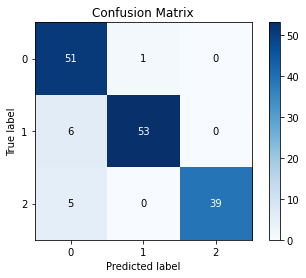

In [7]:
test_preds = model.predict(x_test).argmax(axis=1)
plot_confusion_matrix(y_test, test_preds, normalize=False)